## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification? 
   The output of regression is a prediction that is a continuos numerical value. Classification is a prediction that is a category or label. 
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
   It is a table that compares predicted labels with actual labels. It shows the models performance and breaks it down into four different quadrants: True Positive, True Negative, False Positive, and False Negative. It helps understand why a model isn't working the way we want it to.
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
   The ratio of correct predictions to the total predictions. TP+TN/All Four Quadrants added up
4. What does the root mean squared error quantify about a particular model?
   The average magnitude of the error in a regression model. It highlights when the model doesn't not accurately represent the data.
5. What are overfitting and underfitting?
   Overfitting is when the model is too complex. Focuses on noise instead of the pattern. Not as good on new data. Underfitting is too simple to capture the trend in the data. 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
   It allows a simulation to see how the model will perform with real data. We would choose k=1 since it almost always overfits. This value can ensure that the model isn't just lucky.
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
   Class label - Strengths: Simple to understand with a clear decision. Weaknesses: Hides model uncertainty
   Probability - Strenths: Gives a measure of certainty which allows to make thresholds for decisions. Weaknesses: Needs more interpretation, won't give you a yes or no answer.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   voltage    338 non-null    float64 
 1   height     338 non-null    float64 
 2   soil       338 non-null    float64 
 3   mine_type  338 non-null    category
dtypes: category(1), float64(3)
memory usage: 8.6 KB


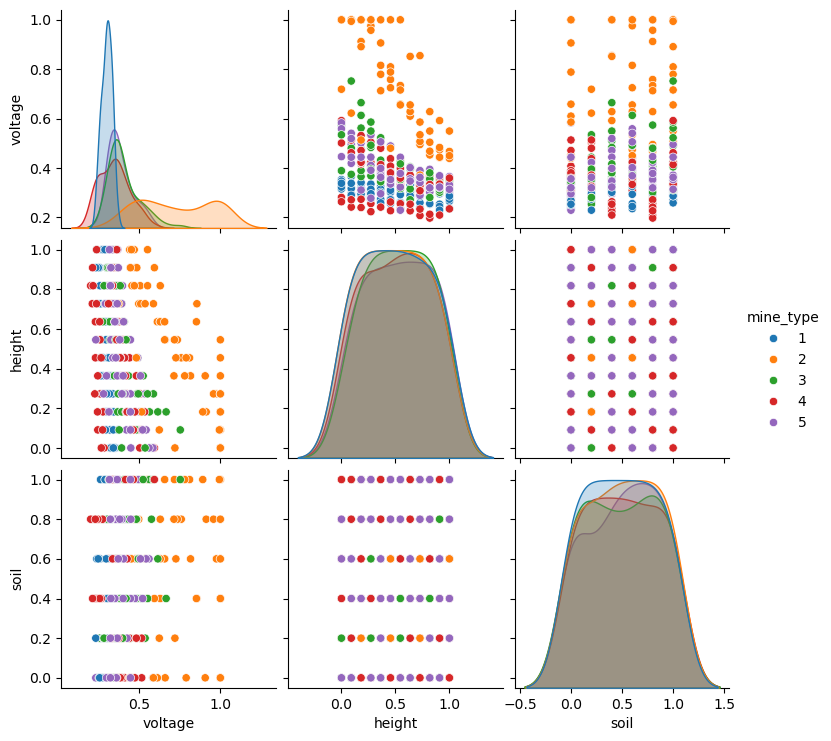

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#1
land = pd.read_csv("data/land_mines.csv")
land["mine_type"] = land["mine_type"].astype("category")
land.head()
land.info()
land.describe()
land["mine_type"].value_counts()
land["mine_type"].value_counts(normalize=True)

sns.pairplot(land, hue="mine_type")
plt.show()

In [2]:
#2
X = land[["voltage", "height", "soil"]]
y = land["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    stratify=y,
    random_state=42
)

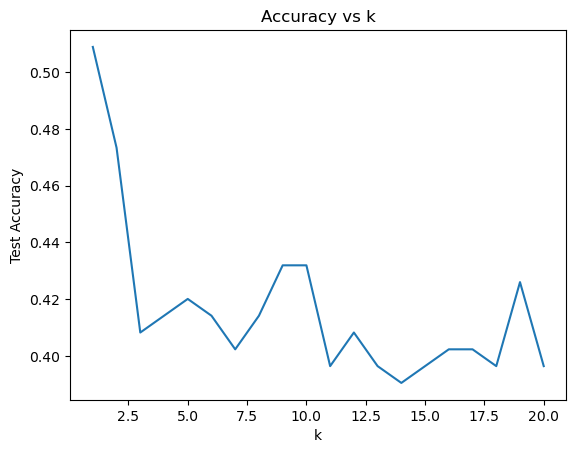

1


In [3]:
#3
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs k")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(best_k)

K=1 is the best because the test-set accuracy over a range of values and choosing the value that achieved the highest accuracy.


In [4]:
#4
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_pred = knn_best.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

0.5088757396449705
[[22  0  3  3  8]
 [ 0 32  0  3  0]
 [ 7  0 10  9  7]
 [ 6  5  4 13  5]
 [ 6  0 10  7  9]]


The model struggles distinguishing between Types 3, 4, and 5, suggesting those classes overlap in feature space. Type 2 appears much more separable from the others. Accuracy is only slightly better than random guessing, but still far from strong performance.

#5
Because the model makes substantial mistakes, especially confusing mine types 3, 4, and 5, it should not be used as a standalone decision tool in high-risk settings. Instead, it should serve as decision support, where uncertain or high-risk predictions are verified by trained experts and operators are cautious when classifications are ambiguous.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [6]:
#1
cars = pd.read_csv("./data/USA_cars_datasets.csv")
cars = cars[["price", "year", "mileage"]]
cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [7]:
print(cars.shape)
print(cars.isna().sum())
cars = cars.dropna()

(2499, 3)
price      0
year       0
mileage    0
dtype: int64


In [8]:
#2
cars["year_norm"] = (cars["year"] - cars["year"].min()) / (cars["year"].max() - cars["year"].min())
cars["mileage_norm"] = (cars["mileage"] - cars["mileage"].min()) / (cars["mileage"].max() - cars["mileage"].min())
X = cars[["year_norm", "mileage_norm"]]
y = cars["price"]

In [9]:
#3
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

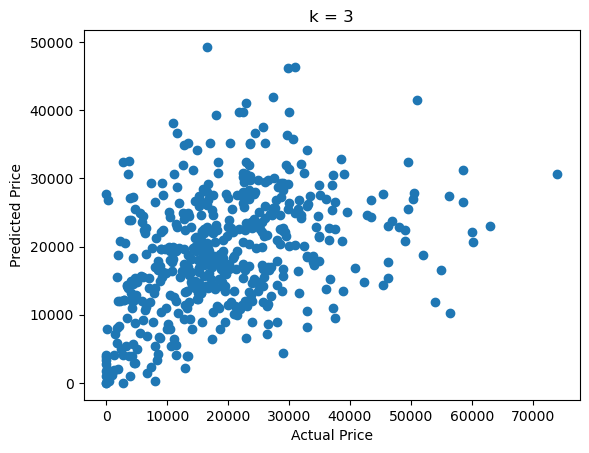

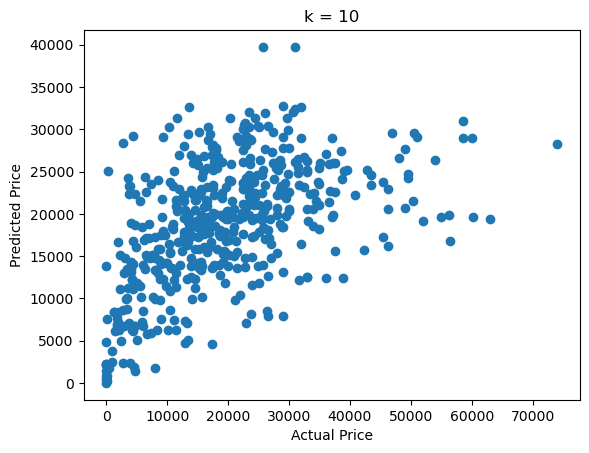

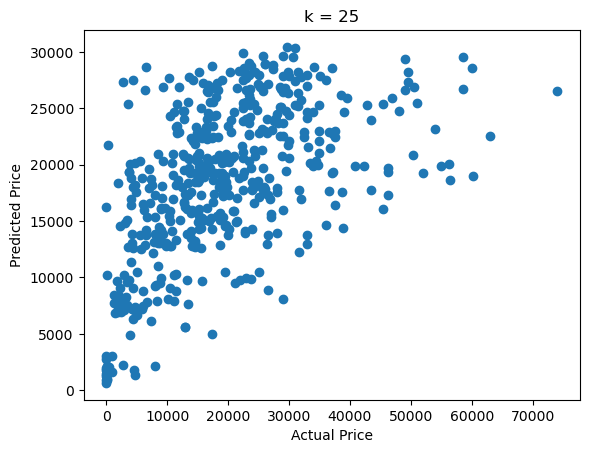

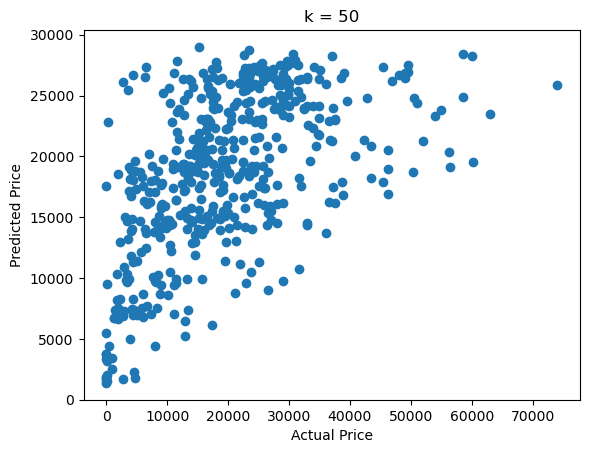

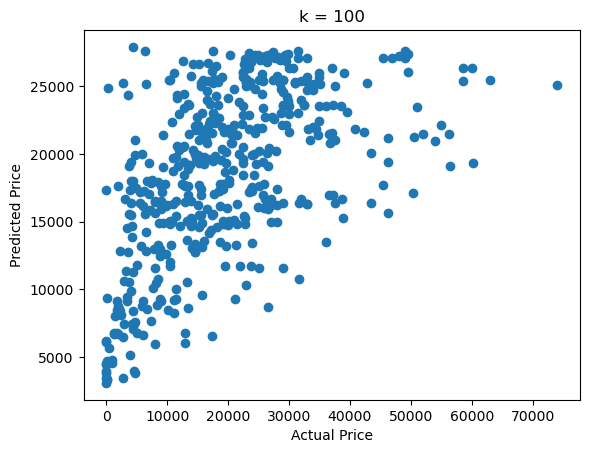

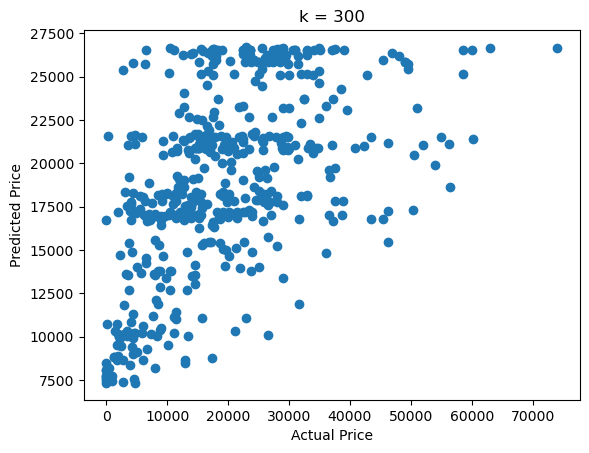

{3: 148104157.1862222,
 10: 117399126.10604002,
 25: 112600455.15990078,
 50: 110202549.3014296,
 100: 112251075.33766721,
 300: 114497987.75799589}

In [10]:
#4
k_values = [3, 10, 25, 50, 100, 300]

mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    
    # Scatterplot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}")
    plt.show()

mse_results

As K increases throughout the graphs, it creates smoother data and underfits more.

In [11]:
#5
optimal_k = min(mse_results, key=mse_results.get)
optimal_k

50

The optimal value of k is 50, since it produces the lowest test MSE

#6
When k=3, the model overfits the data, producing highly variable predictions that follow noise in the training set, resulting in a large MSE. As k increases to 25 and 50, the model becomes smoother and generalizes better, reducing test error. However, when k increases further (100 and 300), the model begins to underfit, as predictions shrink toward the overall mean price and fail to capture variation in high- and low-priced cars, causing MSE to increase again.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

Missing ratings: 8323
Observed ratings: 22155
Complete training cases: 22111
Best k: 30
Rows eligible for imputation: 8282
    Review Scores Rating  Price  Beds  Imputed Rating
0                    NaN  145.0   1.0       94.533333
1                    NaN   37.0   1.0       90.566667
2                    NaN   28.0   1.0       83.433333
3                    NaN  199.0   3.0       89.000000
13                   NaN   68.0   1.0       91.166667


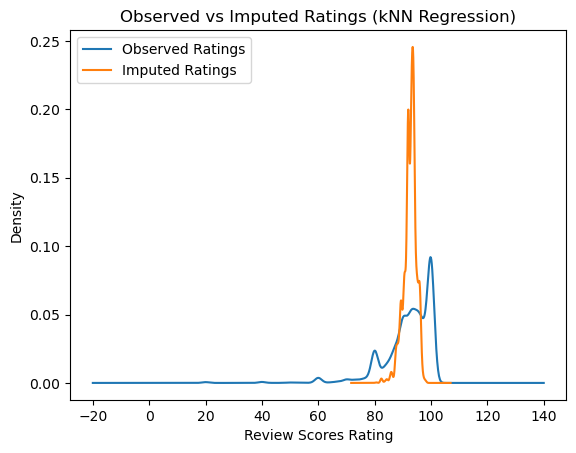

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1
df = pd.read_csv("data/airbnb_hw.csv")

df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace("$", "", regex=False)
    .astype(float)
)

df = df[["Review Scores Rating", "Price", "Beds"]]

#2
missing_df = df[df["Review Scores Rating"].isnull()].copy()
df = df[~df["Review Scores Rating"].isnull()].copy()

print("Missing ratings:", missing_df.shape[0])
print("Observed ratings:", df.shape[0])

#3
df = df.dropna(subset=["Price", "Beds"])
print("Complete training cases:", df.shape[0])

#4
X = df[["Price", "Beds"]]
y = df["Review Scores Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ks = range(1, 31)
sse_values = []

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    sse = np.sum((y_test - preds) ** 2)
    sse_values.append(sse)

best_k = ks[np.argmin(sse_values)]
print("Best k:", best_k)

#5
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(scaler.fit_transform(X), y)

missing_df = missing_df.dropna(subset=["Price", "Beds"])
print("Rows eligible for imputation:", missing_df.shape[0])

X_missing = missing_df[["Price", "Beds"]]
X_missing_scaled = scaler.transform(X_missing)

missing_predictions = final_model.predict(X_missing_scaled)

missing_df["Imputed Rating"] = missing_predictions

print(missing_df.head())

#6
plt.figure()
df["Review Scores Rating"].plot(kind='kde')
pd.Series(missing_predictions).plot(kind='kde')

plt.legend(["Observed Ratings", "Imputed Ratings"])
plt.xlabel("Review Scores Rating")
plt.title("Observed vs Imputed Ratings (kNN Regression)")
plt.show()

The imputed ratings are more tightly concentrated around the high 90s then anywhere else, and show less variability than the observed ratings. This suggests that kNN regression shrinks predictions toward the mean, producing a smoother distribution with fewer extreme values compared to the original data.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)